In [82]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import re
import string

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag
import nltk

# Preprocessing

In [5]:
# Initialize the stemmer
stemmer = PorterStemmer()

# Modified preprocessing function to include stemming
def preprocess_text_with_stemming(text, allowed_pos={'NOUN', 'VERB'}):
    # Convert text to lowercase
    text = text.lower()
    # Remove non-word characters
    text = re.sub(r'\W', ' ', text)
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Remove punctuation
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    # Remove newline characters
    text = re.sub(r'\n', '', text)
    # Remove words containing numbers
    text = re.sub(r'\w*\d\w*', '', text)
    # Apply stemming
    stemmed_text = " ".join([stemmer.stem(word) for word in text.split()])
    return stemmed_text

In [6]:
data_fake = pd.read_csv('Fake.csv')
data_true = pd.read_csv('True.csv')

In [ ]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [8]:
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [9]:
data_fake["class"] = 0
data_true["class"] = 1

In [10]:
print(data_fake.shape, data_true.shape)

(23481, 5) (21417, 5)


In [11]:
data_merge = pd.concat([data_fake, data_true], axis = 0)
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [12]:
# Merging was successful
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [13]:
data_merge.tail(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [14]:
# Determining is the subject column is useful or not
data_merge['subject'].unique()
# Because it is not a News Type classification task this column is useless

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east', 'politicsNews', 'worldnews'], dtype=object)

In [15]:
data = data_merge.drop(['title', 'subject' , 'date'], axis = 1)

In [16]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 21416
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   class   44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


In [18]:
# Shuffling the rows
data = data.sample(frac = 1)
data.head()

# data = data.sample(frac=1).reset_index(drop=True) # Simplify it for the rest of the group

,text,class
12502,"BNEI BRAK, Israel (Reuters) - Hundreds of thou...",1
1810,In an interview with Fox Business that aired T...,0
19161,,0
11345,"Professor Olga Cox, who teaches Human Sexualit...",0
13476,WASHINGTON/LONDON (Reuters) - President Donald...,1


In [19]:
data.reset_index(inplace = True)
data.head()

,index,text,class
0,12502,"BNEI BRAK, Israel (Reuters) - Hundreds of thou...",1
1,1810,In an interview with Fox Business that aired T...,0
2,19161,,0
3,11345,"Professor Olga Cox, who teaches Human Sexualit...",0
4,13476,WASHINGTON/LONDON (Reuters) - President Donald...,1


In [20]:
data.drop(['index'], axis = 1, inplace = True)
data.head()

,text,class
0,"BNEI BRAK, Israel (Reuters) - Hundreds of thou...",1
1,In an interview with Fox Business that aired T...,0
2,,0
3,"Professor Olga Cox, who teaches Human Sexualit...",0
4,WASHINGTON/LONDON (Reuters) - President Donald...,1


In [21]:
# Applying the regex and stemmer
data['text'] = data['text'].apply(preprocess_text_with_stemming)

In [22]:
data

,text,class
0,bnei brak israel reuter hundr of thousand of u...,1
1,in an interview with fox busi that air tuesday...,0
2,,0
3,professor olga cox who teach human sexual at o...,0
4,washington london reuter presid donald trump o...,1
...,...,...
44893,trump is win support from latino and from unio...,0
44894,an nypd offic wa assassin earli wednesday by a...,0
44895,tokyo reuter japan and the unit state are prep...,1
44896,brussel reuter the european union s execut gav...,1


In [23]:
data.head()

,text,class
0,bnei brak israel reuter hundr of thousand of u...,1
1,in an interview with fox busi that air tuesday...,0
2,,0
3,professor olga cox who teach human sexual at o...,0
4,washington london reuter presid donald trump o...,1


In [67]:
x = data['text']
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# N-Gram

In [ ]:
print("Starting N-gram analysis on preprocessed text...")

In [ ]:
# Analyze samples from both classes
fake_samples = x_train[y_train == 0].head()
true_samples = x_train[y_train == 1].head()

In [ ]:
def calc_ngram(txt, n):
    """Calculate n-grams for given text."""
    tokens = nltk.word_tokenize(txt)
    return list([" ".join(tokens[i:n+i]) for i in range(len(tokens)-n+1)])

def calc_bi_trigrams(text, n):
    """Calculate bigrams or trigrams."""
    tokens = word_tokenize(str(text))
    if n == 2:
        bigrams_list = nltk.bigrams(tokens)
        return [" ".join(gram) for gram in bigrams_list]
    else:
        trigrams_list = nltk.trigrams(tokens)
        return [" ".join(gram) for gram in trigrams_list]

def count_ngram_with_probabilities(text, n):
    """Calculate n-gram frequencies and probabilities."""
    # Generate n-grams directly from the preprocessed text
    ngrams_list = calc_ngram(text, n)
    
    # Calculate frequencies
    fd = nltk.FreqDist(ngrams_list)
    total_ngrams = len(ngrams_list)
    
    # Calculate probabilities
    probabilities = []
    for ngram, count in fd.items():
        probability = count / total_ngrams
        probabilities.append({
            'ngram': ' '.join(ngram),
            'count': count,
            'probability': probability
        })
    
    # Sort by probability
    probabilities.sort(key=lambda x: x['probability'], reverse=True)
    return probabilities

In [ ]:
print("\nAnalyzing N-grams in Fake News Samples:")
print(fake_samples)
for i, text in enumerate(fake_samples, 1):
    print(f"\nFake News Article {i}:")
    # Analyze bigrams
    bigrams = count_ngram_with_probabilities(text, 2)
    print("Top 5 Bigrams:")
    for item in bigrams[:5]:
        print(f"N-gram: {item['ngram']}, Count: {item['count']}, Probability: {item['probability']:.4f}")
    
    # Analyze trigrams
    trigrams = count_ngram_with_probabilities(text, 3)
    print("\nTop 5 Trigrams:")
    for item in trigrams[:5]:
        print(f"N-gram: {item['ngram']}, Count: {item['count']}, Probability: {item['probability']:.4f}")


# FEATURE ENGINEERING AND CLASSIFICATION

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

binary_vectorizer = CountVectorizer(binary=True)
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Function to evaluate MultinomialNB with different vectorizers
def evaluate_nb(vectorizer, vectorizer_name):
    # Transform the data
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    
    # Initialize and train the model
    nb_model = MultinomialNB()
    nb_model.fit(X_train_vec, y_train)
    
    # Make predictions
    y_pred = nb_model.predict(X_test_vec)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    # Print results
    print(f"\n=== Results for MultinomialNB with {vectorizer_name} Vectorization ===")
    print(f"Accuracy: {accuracy:.4f}")
    
    print("\nConfusion Matrix:")
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {vectorizer_name} Vectorization')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    print("\nClassification Report:")
    print(class_report)
    
    return accuracy

Evaluating MultinomialNB with different vectorization methods...

=== Results for MultinomialNB with Binary Vectorization ===
Accuracy: 0.9563

Confusion Matrix:


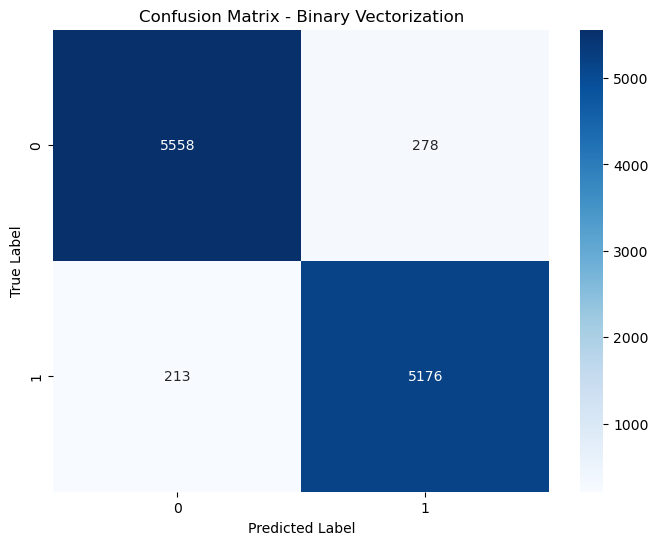


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      5836
           1       0.95      0.96      0.95      5389

    accuracy                           0.96     11225
   macro avg       0.96      0.96      0.96     11225
weighted avg       0.96      0.96      0.96     11225


=== Results for MultinomialNB with Count Vectorization ===
Accuracy: 0.9470

Confusion Matrix:


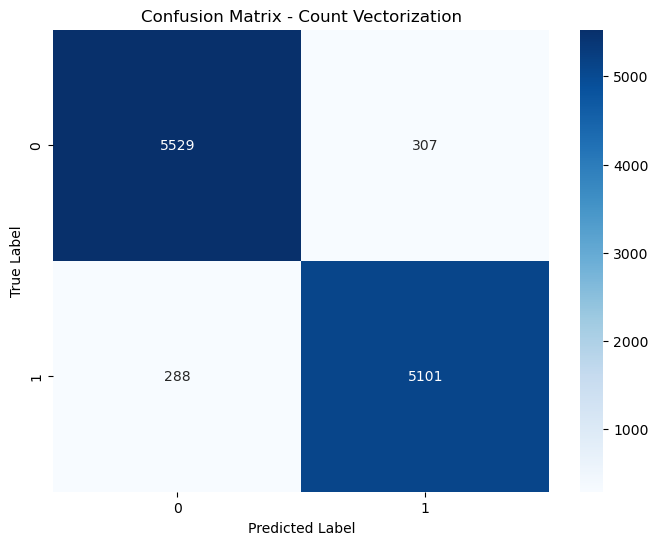


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5836
           1       0.94      0.95      0.94      5389

    accuracy                           0.95     11225
   macro avg       0.95      0.95      0.95     11225
weighted avg       0.95      0.95      0.95     11225


=== Results for MultinomialNB with TF-IDF Vectorization ===
Accuracy: 0.9284

Confusion Matrix:


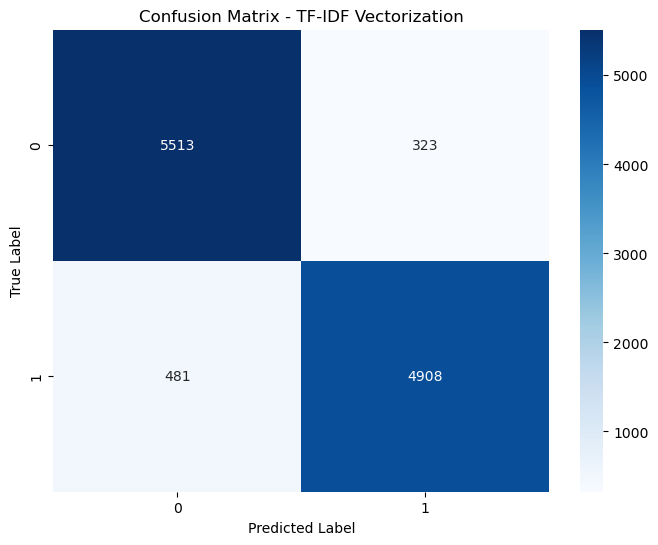


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      5836
           1       0.94      0.91      0.92      5389

    accuracy                           0.93     11225
   macro avg       0.93      0.93      0.93     11225
weighted avg       0.93      0.93      0.93     11225



In [85]:
# Evaluate with each vectorization method
print("Evaluating MultinomialNB with different vectorization methods...")

# Binary Vectorization
binary_acc = evaluate_nb(binary_vectorizer, "Binary")

# Count Vectorization
count_acc = evaluate_nb(count_vectorizer, "Count")

# TF-IDF Vectorization
tfidf_acc = evaluate_nb(tfidf_vectorizer, "TF-IDF")

# Compare accuracies
accuracies = {
    'Binary': binary_acc,
    'Count': count_acc,
    'TF-IDF': tfidf_acc
}

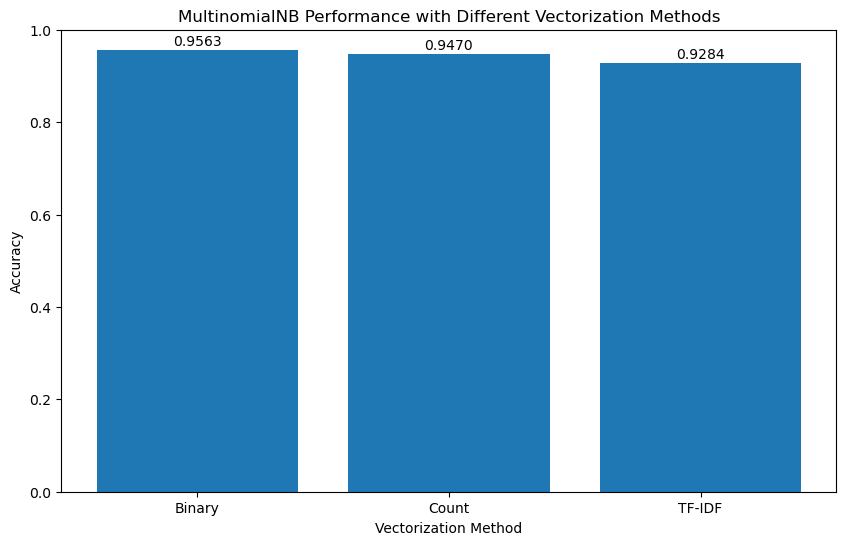


Best performing vectorization method: Binary with accuracy: 0.9563


In [88]:
# Plot accuracy comparison
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values())
plt.title('MultinomialNB Performance with Different Vectorization Methods')
plt.xlabel('Vectorization Method')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, v in enumerate(accuracies.values()):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')
plt.show()

# Print best performing method
best_method = max(accuracies.items(), key=lambda x: x[1])
print(f"\nBest performing vectorization method: {best_method[0]} with accuracy: {best_method[1]:.4f}")